PCA experiments: Take any digit data ( ‘0’,...,‘9’), or all of them, \
from website
http://www-stat.stanford.edu/~tibs/ElemStatLearn/datasets/zip.digits/ \
and perform PCA experiments with Matlab or other languages (e.g. ipynb) you are familiar:

set up the data X (p * n)

In [1]:
import pandas as pd
import io
import requests

import numpy as np
import matplotlib.pyplot as plt

# Load dataset as 16x16 gray scale images of handwritten zip code 3, of total number 657.

url = "https://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/zip.digits/train.7"
s = requests.get(url).content
c = pd.read_csv(io.StringIO(s.decode('utf-8')))
data = np.array(c,dtype='float32'); 
X = data.T
X.shape


(256, 644)

centering X:  $X-\mu\ 1^T$

In [3]:
mu = np.mean(X, axis=1) 

# plt.imshow(np.reshape(mu,(16,16)),cmap='gray')

# np.reshape(mu,(mu.size,1))  # useless, still array
mu = mu[:, np.newaxis]
mu.shape  # p*1 (can be subtracted by X directly)


(256, 1)

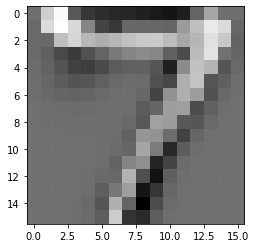

In [4]:
X = X - mu
plt.imshow(np.reshape(X[:,100],(16,16)),cmap='gray');

SVD (k=50)

(256, 644) (256, 256) (256,) (644, 644)


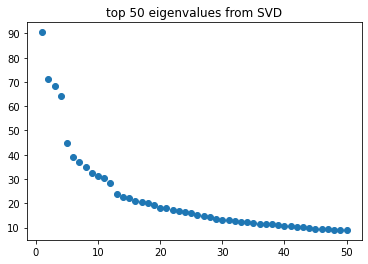

In [19]:
import numpy.linalg as alg

u, s, v = alg.svd(X)
v = v.T
print(X.shape, u.shape, s.shape, v.shape)

n_component = np.arange(1,51,1)
plt.plot(n_component, s[:50],'o',linewidth=2);
plt.title('top 50 eigenvalues from SVD');

Covriance matrix; eigenvalues/vectors

In [7]:
cov_matrix = np.cov(X) # each column is a sample
# plt.imshow(cov_matrix,cmap='gray');

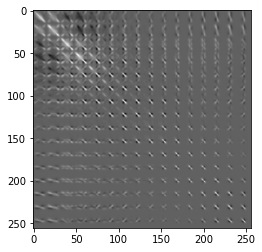

In [40]:
# compute covirance matrix directly, the same result as above
n = X.shape[1]
cov1 = X @ X.T / n
plt.imshow(cov1,cmap='gray');  

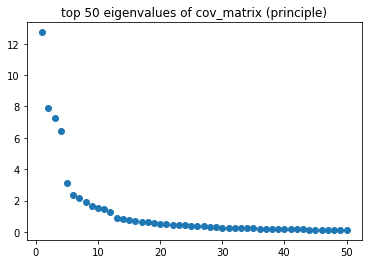

In [10]:
eigenvalues, eigenvectors = alg.eig(cov_matrix)

n_components = np.arange(1,51,1)
plt.plot(n_components, eigenvalues[:50],'o',linewidth=1);
plt.title('top 50 eigenvalues of cov_matrix (principle)');

Explained variation of data by principal components

<ipython-input-57-7f5db7631a0a>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  ratio[i] = summation/trace


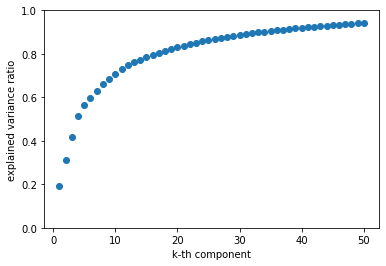

In [57]:
trace = np.sum(eigenvalues)
ratio = np.zeros(len(eigenvalues))
summation = 0
for i in range(len(eigenvalues)):
    summation += eigenvalues[i]
    ratio[i] = summation/trace
# ratio = [ eigenvalues[i]/trace for i in range(len(eigenvalues)) ]

plt.plot(n_components,ratio[:50],'o',linewidth=2)
plt.ylabel('explained variance ratio');
plt.ylim(0,1)
plt.xlabel('k-th component');

Visualize the mean;\
Visualize the top-k principle components as left singular vectors
U = [u1, . . . , uk]

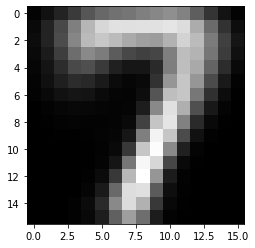

In [23]:
plt.imshow(np.reshape(mu,(16,16)),cmap='gray');

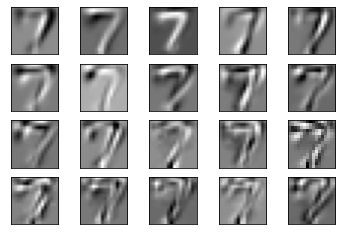

In [24]:
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(np.reshape(u[:,i],(16,16)),cmap='gray')
    
    plt.xticks([])
    plt.yticks([])

k=1: order images according to right singular vector v1

In [49]:
v1 = eigenvectors[:,0]
proj_1 = X.T @ v1
print(v1.shape,proj_1.shape)

sorted_id = sorted(range(len(proj_1)), key = lambda k: proj_1[k], reverse=False )  # search for index
print('i of smallest 10 v1(i):','\n',sorted_id[:10])
print('v1(i):\n',proj_1[sorted_id[:10]])

print()
print('i of top 10 v1(i):\n',sorted_id[-10:-1])
print('v1(i):\n',proj_1[sorted_id[-10:-1]])

(256,) (644,)
i of smallest 10 v1(i): 
 [19, 150, 304, 343, 207, 285, 371, 305, 587, 181]
v1(i):
 [-8.22444983 -7.94156942 -7.52310881 -7.50091106 -7.43826331 -7.40611988
 -7.34782134 -7.29053052 -7.24496575 -7.23331731]

i of top 10 v1(i):
 [261, 235, 322, 562, 265, 384, 440, 209, 279]
v1(i):
 [5.35125706 5.35826195 5.40427943 5.41622785 5.49182321 5.5598632
 5.57164516 5.60157693 5.62023834]


(256, 644) (644,)
(256,)


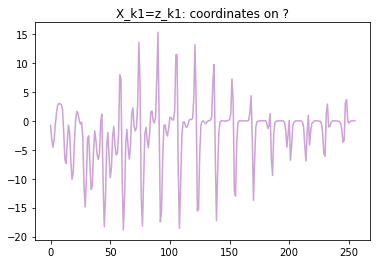

In [51]:
    # calculate the coordinates on v1
v1 = v[:,0]  # the first column
print(X.shape, v1.shape)
X_k1 = X @ v1
print(X_k1.shape)

    # the other way
z_k = u[:,:50] @ np.diag(s[:50]) # coordinates on v_k (1:k column)
z_k1 = u[:,0] * s[0]  # on v1

plt.plot(X_k1,'r',alpha=0.2)
plt.plot(z_k1,'b',alpha=0.2)
plt.title('X_k1=z_k1: coordinates on ?')

# plt.imshow(np.reshape(X_k1,(16,16)),cmap='gray');
# plt.xticks([]);
# plt.yticks([]);

sorted_id = sorted(range(len(X_k1)), key = lambda k: X_k1[k], reverse=False )  # search for index




In [ ]:


# Reshape the data into image of 16x16 and show the image.
import matplotlib.pyplot as plt
img1 = np.reshape(data[1,:],(16,16));
imgshow = plt.imshow(img1,cmap='gray')

img2 = np.reshape(data[39,:],(16,16));
imgshow = plt.imshow(img2,cmap='gray')

# Now show the mean image.
mu = np.mean(data, axis=0);
img_mu = np.reshape(mu,(16,16));
imgshow = plt.imshow(img_mu,cmap='gray')

##########################################
# PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=50, svd_solver='arpack')
pca.fit(data)

print(pca.explained_variance_ratio_) 

# Plot the 'explained_variance_ratio_'

plt.plot(pca.explained_variance_ratio_, "o", linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

# Principal components

Y = pca.components_;
Y.shape

# Show the image of the 1st principal component

img_pca1 = np.reshape(Y[1,:],(16,16));
imgshow = plt.imshow(img_pca1,cmap='gray')

# Show the image of the 2nd principal component

img_pca2 = np.reshape(Y[2,:],(16,16));
imgshow = plt.imshow(img_pca2,cmap='gray')

# Show the image of the 3rd principal component

img_pca3 = np.reshape(Y[3,:],(16,16));
imgshow = plt.imshow(img_pca3,cmap='gray')